$$
{%
  \large \textbf{Lab1: Discrete-Time Models} \\
    \textit{by Manuel Enciso Martinez}}
$$

In [1]:
from pylab import *
from numpy import *

"DATA"
meandensity = array([2,0,14,34,56,94,189,266,330,416,507,580,610,513,593,557,560,522,565,517,500,585,500,495,525,510])
days = 25
dayslist = [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,24]
top = 540 # the moment pn+1 ≤ pn happend at day 12


def grow(pn,cte):
    return(cte*(top-pn)*pn)


We find a method to estimate C using only days 2 through 12. Since day 1 does not have mean density data.

We are using the formula $C_n = \frac{p_{n+1}-p_n}{540-p_n}$ for $n \in \{2,3,\dots,11\}$.

In [2]:
En = zeros(days)
Cn = zeros(days)


for i in range(2,11):
    Cn[i] = (meandensity[i+1] - meandensity[i]) / ((top-meandensity[i])*meandensity[i])
    erracum = zeros(9)
    for j in range(2,11):
        erracum[j-2] = abs((grow(meandensity[j],Cn[i])+meandensity[j])-meandensity[j+1]) 
        #we compare the estimation with our data
    En[i-2] = max(erracum) #we choose for the error of Cn the biggest erracum

In [3]:
min(En[0:8])

49.54301948051943

This is the lowest error our method calculates, then we choose $c = c_4$, which corresponds to our lowest error.

Let us try another estimation of c by taking the mean of all our $c_n$.

In [4]:
C1 = Cn[2] #C with lowest error
C2 = sum(Cn)/9 #Mean

()

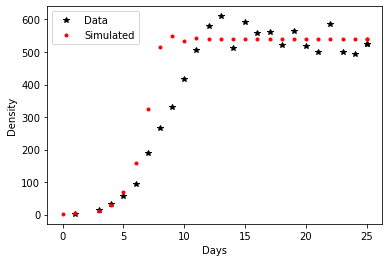

In [5]:
def graf1(): 
    figure('Paramecium aurelia estimation #1')
    xlabel('Days')
    ylabel('Density')
    Lx = linspace(0,days,100)
    plot(dayslist+ones(len(dayslist)),meandensity[dayslist],'*',color='black')
    Pn = 2 #day 0 start 2 mean density
    plot(0,Pn ,'.',color='red',label='estimation')
    for i in dayslist:
        plot(i+1,grow(Pn,C1)+Pn ,'.',color='red')
        Pn = grow(Pn,C1)+Pn
    legend(['Data', 'Simulated'])
    return()

graf1()


$\textit{Simulation with $c_1$}$

()

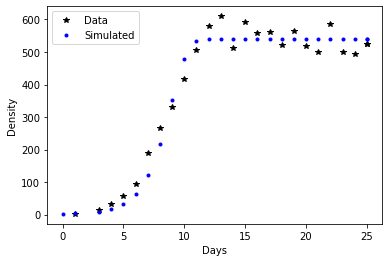

In [6]:
def graf2(): 
    figure('Paramecium aurelia estimation #2')
    xlabel('Days')
    ylabel('Density')
    Lx = linspace(0,days,100)
    plot(dayslist+ones(len(dayslist)),meandensity[dayslist],'*',color='black')
    Pn = 2 #day 0 start 2 mean density
    plot(0,Pn ,'.',color='blue',label='estimation')
    for i in dayslist:
        plot(i+1,grow(Pn,C2)+Pn ,'.',color='blue')
        Pn = grow(Pn,C2)+Pn
    legend(['Data', 'Simulated'])
    return()

graf2()

$\textit{Simulation with $c_2$}$

$\textbf{1.2:}$ Recall that the choice to use the number 540 in this equation was rather arbitrary. Try to improve the model.

In this program, we sum the values at the moment when the density 
starts to decrease and we average those values to get a better peak value. 

In [7]:
def prop(A): 
    daysacum = dayslist[1] #we start by the day 1 since it doesnt has data      
    while(A[daysacum] < A[daysacum+1] and len(A)-3>=daysacum):
        daysacum += 1
    if A[daysacum] > A[daysacum+1]:
        minimo = min(A[daysacum:len(A)])
        while(A[daysacum] > minimo):
            daysacum -= 1
        if A[daysacum] <= minimo:
            daysacum +=1
        C = sum(A[daysacum:len(A)])/len(A[daysacum:len(A)])
    else:
        print('List',A,'doesnt stop incrising')
    return(C)
    
print('An alternative peak value would be',prop(meandensity))

An alternative peak value would be 539.9375


Then 540 was a good choice for our peak value.